## Task

Detect transactions outliers

- You have got a dataset
- You have got a demonstration of preliminary data clenaning (lab2.1.ipynb, lab2.2.ipynb)
- You have got a pickled card_lbe and doc_lbe (pipeline in lab2.lbe.ipynb) to make the same mapping of id_card and id_doc

Use Characteristics of quantitative data and techniques for detection of inadequate transactions and collect id_card (mapped by using card_lbe) you think not real customers.

Create a pull request by using a format hw1.1;lastname;firstname

## About dataset

The raw dataset consists of 9 different columns

**date** - is the timestamp when the purchase was done

**id_doc** - receipt's id

**id_order** - is the order's id. Order's id is equal to 0 when the purchase was done offline, otherwise online.

**id_card** - is the unique id of customer.

**id_tov** - is the unique id of product's id

**id_kontr** - distributor's id

**quantity** - the amount of the same product in receipt which was purchased

**sum** - price of the product

**is_green** - shows that product is under discount or not

In [1]:
from pathlib import Path
import pandas as pd
import gc
from sklearn.preprocessing import LabelEncoder
import pickle
import bz2

Files `09_prepared.pkl.bz2`, `10_prepared.pkl.bz2`, `11_prepared.pkl.bz2`, were taken from @Qvviko

In [2]:
data_path = Path('./data/').resolve()
!ls {data_path}

09_prepared.pkl.bz2  products_sum_20200901	products_sum_20201101
10_prepared.pkl.bz2  products_sum_20200901.zip	products_sum_20201101.zip
11_prepared.pkl.bz2  products_sum_20201001
product_groups.docx  products_sum_20201001.zip


### merge

In [3]:
from pathlib import Path
import pandas as pd
import gc
from sklearn.preprocessing import LabelEncoder
import pickle
import bz2

def read_file(filename):
    with bz2.open(data_path / filename, 'rb') as f:
        return pickle.load(f).drop(['id_doc', 'id_card'], axis='columns')

In [4]:
df = pd.concat(
    [
        read_file('09_prepared.pkl.bz2'), 
        #read_file('10_prepared.pkl.bz2'), 
        #read_file('11_prepared.pkl.bz2')
    ]
)

## Basic EDA

In [5]:
df.head()

,date,id_order,id_tov,id_kontr,quantity,sum,is_green,id_card_int,id_doc_int
0,2020-09-01 17:01:25,0,52,271,1.0,108.00,False,1538855,1283228
1,2020-09-01 17:35:36,0,52,271,1.0,108.00,False,267307,8873113
2,2020-09-01 19:19:21,0,52,271,1.0,107.95,False,610220,12712899
3,2020-09-01 21:53:34,0,52,271,1.0,108.00,False,441497,21535283
4,2020-09-01 18:42:31,0,61,97,2.0,88.00,False,1065358,642341


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42100858 entries, 0 to 42100857
Data columns (total 9 columns):
 #   Column       Dtype         
---  ------       -----         
 0   date         datetime64[ns]
 1   id_order     int64         
 2   id_tov       int64         
 3   id_kontr     int64         
 4   quantity     float64       
 5   sum          float64       
 6   is_green     bool          
 7   id_card_int  int64         
 8   id_doc_int   int64         
dtypes: bool(1), datetime64[ns](1), float64(2), int64(5)
memory usage: 2.5 GB


In [7]:
df.describe()

,id_order,id_tov,id_kontr,quantity,sum,id_card_int,id_doc_int
count,4.210086e+07,4.210086e+07,4.210086e+07,4.210086e+07,4.210086e+07,4.210086e+07,4.210086e+07
mean,7.765869e+05,1.763064e+04,1.045977e+04,1.427065e+00,1.149112e+02,8.446032e+05,1.170384e+07
std,2.032896e+06,1.103226e+04,8.794764e+03,3.101411e+01,1.072201e+02,5.388947e+05,6.760102e+06
min,0.000000e+00,4.600000e+01,-9.999000e+03,-2.755000e+00,-1.022110e+03,0.000000e+00,2.000000e+00
25%,0.000000e+00,1.452600e+04,3.850000e+02,1.000000e+00,4.800000e+01,3.650470e+05,5.848724e+06
50%,0.000000e+00,1.943500e+04,1.358100e+04,1.000000e+00,8.900000e+01,8.150010e+05,1.170182e+07
75%,0.000000e+00,2.455800e+04,1.630400e+04,1.000000e+00,1.501100e+02,1.288708e+06,1.755596e+07
max,6.673056e+06,3.866000e+04,2.194300e+04,5.000000e+03,3.840000e+04,1.944074e+06,2.341787e+07


## Rich customers

In [8]:
gr = df.groupby('id_card_int', as_index=False).sum().sort_values('sum')


In [9]:
gr.head()

,id_card_int,id_order,id_tov,id_kontr,quantity,sum,is_green,id_doc_int
1334505,1871302,0,21435,102,1.0,0.0,0,21829155
396386,527413,0,179951,86824,5.0,0.0,5,86521061
1316281,1843017,0,234032,113846,12.0,0.0,0,23359304
306743,405371,0,162821,75401,8.0,0.0,4,58061750
277094,365257,0,647,-9999,1.0,0.0,0,2932231


In [10]:
gr.tail()

,id_card_int,id_order,id_tov,id_kontr,quantity,sum,is_green,id_doc_int
1054559,1447941,1846224652,11934022,4583099,767.353,98215.49,3,7513709846
1260542,1755035,19554147,279221,203854,51.000,116411.20,2,205354227
910003,1243870,0,14823178,9579794,1032.448,124131.91,5,7581114411
426570,568930,2234948749,17156402,8733962,1869.601,211154.31,8,5952086098
652503,883386,0,4163789442,2123776403,229022.537,18259091.85,355,2226507914953


array([[<AxesSubplot:title={'center':'sum'}>]], dtype=object)

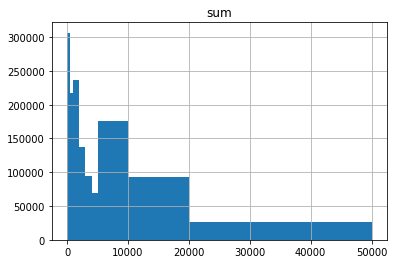

In [11]:
gr.hist('sum', 
        bins=[0,500,1000,2000,3000,4000,5000,10000,20000,50000],
        )

In [12]:
gr['sum'].describe()[['min', '25%', '50%', '75%', 'max']]

min           0.00
25%         555.00
50%        1577.82
75%        4336.58
max    18259091.85
Name: sum, dtype: float64

In [13]:
std, mean = gr['sum'].std(), gr['sum'].mean()
thresh = mean + std * 5
'thresh', thresh

('thresh', 86066.03536052944)

In [14]:
(gr['sum'] > thresh).sum()

8

In [15]:
rich_clients = gr[gr['sum'] > thresh]['id_card_int'].values
print(rich_clients)

[  57748  497966  935791 1447941 1755035 1243870  568930  883386]


## Customers with expensive docs

In [16]:
gr = df.groupby(by='id_doc_int', as_index=False).sum()[['sum', 'id_doc_int']].sort_values(by='sum')


In [17]:
gr.tail(15)

,sum,id_doc_int
5563359,17995.87,16895572
6707135,18120.00,20374410
5664229,18284.91,17203033
3455834,18466.00,10492848
3283398,19017.36,9968657
504194,19248.49,1531730
2768688,19940.99,8404161
3079262,19963.06,9348554
1923554,20332.35,5841003
7139798,21245.57,21687422


In [18]:
gr['sum'].describe()[['min', '25%', '50%', '75%', 'max']]

min        0.00
25%      209.00
50%      415.00
75%      795.35
max    48005.00
Name: sum, dtype: float64

In [19]:
std, mean = gr['sum'].std(), gr['sum'].mean()
thresh = mean + std * 5
'thresh', thresh

('thresh', 4004.148726884987)

In [20]:
import numpy as np
gr['sum'].quantile(q=np.linspace(0.9999, 1, 50))

0.999900     9248.768160
0.999902     9289.669779
0.999904     9317.518281
0.999906     9392.148294
0.999908     9427.899557
0.999910     9453.487923
0.999912     9494.413395
0.999914     9544.517434
0.999916     9596.179704
0.999918     9638.800145
0.999920     9677.762581
0.999922     9719.434273
0.999924     9767.969888
0.999927     9811.990565
0.999929     9869.987237
0.999931     9927.241009
0.999933     9974.521820
0.999935    10026.986036
0.999937    10080.302608
0.999939    10144.400582
0.999941    10196.030252
0.999943    10267.052718
0.999945    10356.021534
0.999947    10436.106395
0.999949    10513.702676
0.999951    10616.297953
0.999953    10694.315291
0.999955    10762.259743
0.999957    10876.937779
0.999959    10992.347863
0.999961    11129.568855
0.999963    11260.273648
0.999965    11384.915357
0.999967    11525.674289
0.999969    11622.696711
0.999971    11744.076281
0.999973    11897.799262
0.999976    12066.089774
0.999978    12236.879429
0.999980    12434.593459


In [21]:
thresh = gr['sum'].quantile(0.999995)
print('thresh', thresh)
print((gr['sum'] > thresh).sum())

expensive_docs = gr[gr['sum'] > thresh]['id_doc_int'].values
expensive_docs_clients = df[df['id_doc_int'].isin(expensive_docs)]['id_card_int'].unique()

print(expensive_docs_clients)

thresh 15495.91849686103
39
[ 784343 1552728  225201  568930 1260932 1429536 1911522  636272  588107
  161838  648111      48  488719  274667  686321  948175  348919  816031
  132928  508835 1750466  388932  368551 1929067 1121726  129282 1499243
 1268851 1755035]


## quantity = 0

In [22]:
zero_quantity = df[df['quantity']==0].groupby('id_card_int').count().sort_values('id_doc_int')
zero_quantity

,date,id_order,id_tov,id_kontr,quantity,sum,is_green,id_doc_int
id_card_int,,,,,,,,
12751,1,1,1,1,1,1,1,1
804951,1,1,1,1,1,1,1,1
1858483,1,1,1,1,1,1,1,1
812051,1,1,1,1,1,1,1,1
894939,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...
167734,2,2,2,2,2,2,2,2
840555,3,3,3,3,3,3,3,3
1731120,3,3,3,3,3,3,3,3


In [23]:
zero_quantity_clients = zero_quantity[-1:].index.values
print(zero_quantity_clients)

[1766517]


## Quantity < 0

In [24]:
neg_quantity = df[df['quantity'] < 0].groupby('id_card_int').count().sort_values('id_doc_int')
neg_quantity.tail()

,date,id_order,id_tov,id_kontr,quantity,sum,is_green,id_doc_int
id_card_int,,,,,,,,
1374348,2,2,2,2,2,2,2,2
472833,2,2,2,2,2,2,2,2
253299,2,2,2,2,2,2,2,2
1485723,2,2,2,2,2,2,2,2
126995,3,3,3,3,3,3,3,3


In [25]:
neg_quantity_clients = df[df.quantity < 0].id_tov.unique()
print(neg_quantity_clients)

[23074]


Seems like all the items with negative quantity are related to the same good. This good belongs to the Exotics category, this naming could explain the fact. Other possible explanations are sales and bug in the system or database

## Total

In [26]:
rich_clients , expensive_docs_clients , zero_quantity_clients

(array([  57748,  497966,  935791, 1447941, 1755035, 1243870,  568930,
         883386]),
 array([ 784343, 1552728,  225201,  568930, 1260932, 1429536, 1911522,
         636272,  588107,  161838,  648111,      48,  488719,  274667,
         686321,  948175,  348919,  816031,  132928,  508835, 1750466,
         388932,  368551, 1929067, 1121726,  129282, 1499243, 1268851,
        1755035]),
 array([1766517]))

In [27]:
total = list(rich_clients) + list(expensive_docs_clients) + list(zero_quantity_clients) + list(neg_quantity_clients)
print(len(total))

39


In [28]:
total = sorted(list(set(total)))

In [29]:
ouliers = pd.DataFrame.from_dict({'id_card': total})

with bz2.open(data_path / 'ruslan.pkl.bz2', 'wb') as f:
    pickle.dump(df, f, protocol=4)

with open('outliers.txt', 'w') as fout:
    for x in total:
        print(x, file=fout)